Importing Statements


In [15]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

After Extracting the brain-tumor-dataset.zip file Upload it to your Drive.Then,Mount the datasets from Google Drive.


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.One Hot Encoding the Target Classes

2.Creating 3 Important Lists:
      
      a)datalist for storing image data in numpy array form.
      b)paths list for storing path of all images.
      c)result list for storing one hot encoded form of target class whether tumor or not


In [17]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [18]:

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [19]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [20]:
result = np.array(result)
result = result.reshape(139,2)
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 64)       

In [22]:
y_train.shape

(111, 2)

Epoch 1/30
3/3 [==============================] - 9s 2s/step - loss: 22.5046 - val_loss: 23.6121
Epoch 2/30
3/3 [==============================] - 7s 2s/step - loss: 14.9604 - val_loss: 27.4374
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 5.7469 - val_loss: 10.1211
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 3.8544 - val_loss: 6.6387
Epoch 5/30
3/3 [==============================] - 7s 2s/step - loss: 1.7341 - val_loss: 14.6774
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 0.5083 - val_loss: 21.5451
Epoch 7/30
3/3 [==============================] - 7s 2s/step - loss: 1.2700 - val_loss: 22.3512
Epoch 8/30
3/3 [==============================] - 7s 2s/step - loss: 0.4392 - val_loss: 20.4757
Epoch 9/30
3/3 [==============================] - 7s 2s/step - loss: 1.0147 - val_loss: 16.5498
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.3308 - val_loss: 14.5670
Epoch 11/30
3/3 [=====================

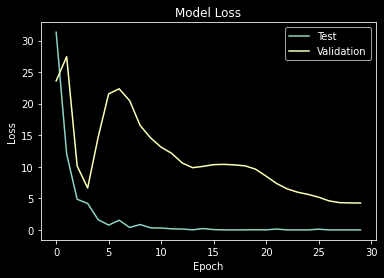

In [23]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [24]:
def names(number):
    if number==0:
        return 'Yes,It is a Tumor'
    else:
        return 'No, It is not a tumor'

Detecting Tumor Found or Not

99.99929666519165% Confidence Yes,It is a Tumor


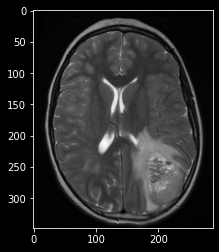

In [25]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence No, It is not a tumor


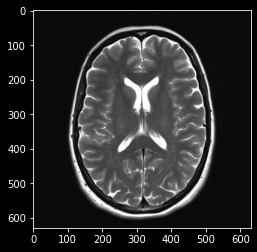

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/No11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

99.9980092048645% Confidence Yes,It is a Tumor


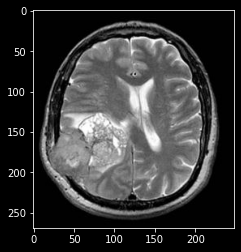

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y116.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))

100.0% Confidence No, It is not a tumor


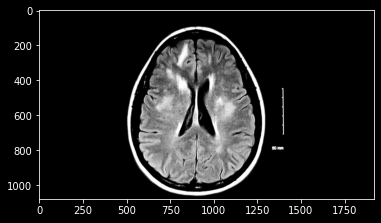

In [28]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/no 9.png")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence ' + names(classification))